In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Weather data for Germany
DeEc15 = pd.read_hdf(os.path.join(os.path.dirname(os.getcwd()), 'Temp', 'DEU_TEMP_EC15.h5'))
#DeGefs = pd.read_hdf("Temp/DEU_TEMP_GEFS.h5")

In [95]:
DeEc15[DeEc15["ValueDateTime"] == '2018-07-02 12:00:00']
one_value_date = DeEc15[DeEc15["ValueDateTime"] == '2018-07-02 12:00:00']
one_value_date["ForecastWindow"] = (one_value_date["ValueDateTime"] - one_value_date["ForecastDateTime"]).dt.total_seconds() / 3600 / 6
one_value_date

ensemble_series = pd.DataFrame()
ensemble_series["ForecastWindow"] = np.unique(one_value_date["ForecastWindow"])
for i in range(0, 50):
    col = "Ensemble" + str(i)
    ensemble_series.loc[:,col] = np.array(one_value_date[one_value_date["ens_num"] == i].sort_values(by = "ForecastWindow")['value'])

/var/folders/j2/7j0fctvs2258gcs69mmjmlsr0000gn/T/ipykernel_36389/1438423345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_value_date["ForecastWindow"] = (one_value_date["ValueDateTime"] - one_value_date["ForecastDateTime"]).dt.total_seconds() / 3600 / 6


In [96]:
ensemble_series

,ForecastWindow,Ensemble0,Ensemble1,Ensemble2,Ensemble3,Ensemble4,Ensemble5,Ensemble6,Ensemble7,Ensemble8,...,Ensemble40,Ensemble41,Ensemble42,Ensemble43,Ensemble44,Ensemble45,Ensemble46,Ensemble47,Ensemble48,Ensemble49
0,0.0,23.542817,23.811517,23.274717,23.670117,23.396117,23.319917,23.759017,23.485017,23.611017,...,23.328817,23.019217,24.072817,23.352817,23.750317,23.943117,23.153317,23.686417,23.428817,23.128717
1,2.0,24.250514,24.457714,24.550714,23.418514,21.722014,24.544614,22.159714,23.266514,23.354714,...,24.674014,23.356514,24.657514,24.500514,24.492014,24.216614,23.949514,24.959914,24.514014,24.980214
2,4.0,24.198414,23.067214,24.028314,24.438614,23.339314,23.739414,23.757514,21.772114,24.579514,...,22.265314,22.864914,23.661014,24.020814,24.123114,24.084114,23.733614,23.233414,24.551214,23.952714
3,6.0,23.220422,23.667122,23.610222,23.010622,21.192422,23.443322,21.040222,23.844822,22.381222,...,23.449422,22.980722,23.255422,22.496822,23.354522,23.026522,21.143722,21.428722,23.616922,21.982622
4,8.0,22.638522,22.766922,21.058222,19.787122,21.253022,22.931622,21.332822,21.387922,22.009222,...,21.625422,22.470222,21.686422,22.348922,23.043322,22.969622,20.771422,22.991322,22.145622,20.267922
5,10.0,22.335190,22.294190,21.669690,24.653990,21.686390,22.056290,22.719590,22.637290,22.965790,...,21.391390,21.197290,22.295090,22.076190,23.531690,22.752990,21.322390,23.148090,22.071690,23.350090
6,12.0,22.515790,23.132490,19.810990,23.835290,20.925390,21.241190,22.940790,21.211690,22.720090,...,21.638290,20.217290,21.419390,22.222690,22.848690,23.878990,22.392790,21.345990,22.597090,22.497390
7,14.0,22.309258,21.517058,23.231258,24.693758,22.389258,23.737558,23.260658,23.497258,21.686358,...,21.951658,21.140358,24.789658,21.024858,20.748858,22.507558,24.285758,23.714458,22.411458,22.226558
8,16.0,21.252158,23.155158,21.942558,21.726758,21.578258,22.186858,24.006658,23.148958,21.175558,...,22.522558,24.122658,24.220058,22.635058,23.061758,21.207258,21.615058,21.942558,22.751458,24.689558
9,18.0,23.174104,25.213404,23.442004,24.559504,22.636004,22.576304,24.603104,20.904004,24.784604,...,25.534604,23.318604,21.651704,22.019404,22.421904,25.242204,24.726504,21.515104,24.272304,22.365804


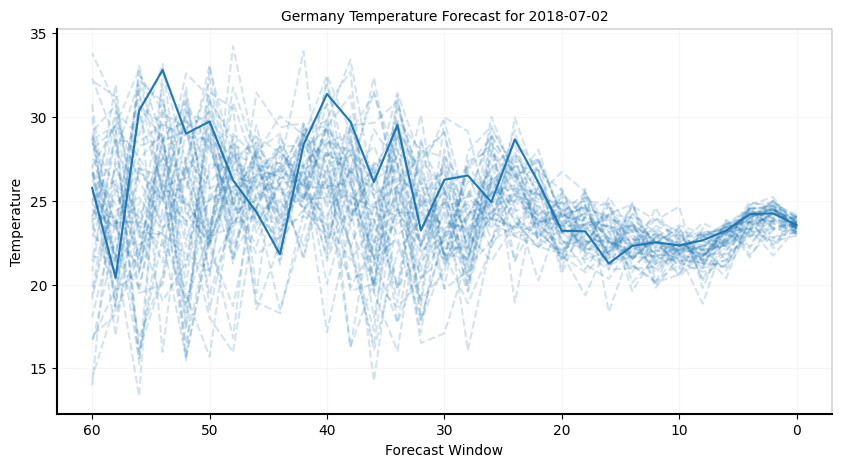

In [113]:
# plot the ensemble series, all ensembles dashed, first ensemble solid
plt.figure(figsize=(10, 5))
for i in range(0, 50):
    col = "Ensemble" + str(i)
    sns.lineplot(data = ensemble_series, x="ForecastWindow", y=col, color="grey", alpha=0.2)
    plt.gca().invert_xaxis()
    plt.gca().lines[i].set_linestyle("--")
    plt.gca().lines[i].set_color("#1f77b4")
sns.lineplot(data=ensemble_series, x="ForecastWindow", y="Ensemble0")
plt.gca().invert_xaxis()
plt.xlabel("Forecast Window")
plt.ylabel("Temperature")
plt.title("Germany Temperature Forecast for 2018-07-02", fontsize=10)
plt.grid(True)
plt.gca().grid(alpha=0.1)
plt.savefig("ensemble_series.png")
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(0.2)
plt.gca().spines['top'].set_linewidth(0.2)
plt.show()

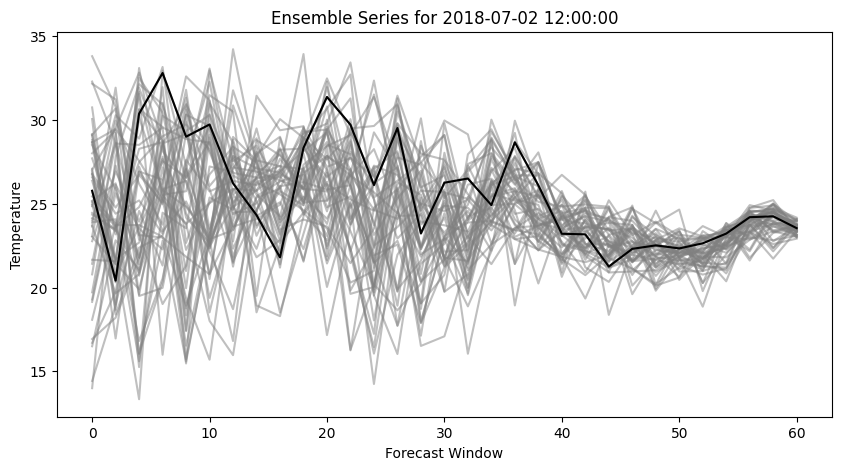

In [77]:
# plot the ensemble series, all ensembles dashed, first ensemble solid
plt.figure(figsize=(15, 5))
for i in range(0, 50):
    col = "Ensemble" + str(i)
    plt.plot(ensemble_series["ForecastWindow"], ensemble_series[col], color='grey', alpha=0.5)
plt.plot(ensemble_series["ForecastWindow"], ensemble_series["Ensemble0"], color='black', alpha=1)
plt.xlabel("Forecast Window")
plt.ylabel("Temperature")
plt.title("Ensemble Series for 2018-07-02 12:00:00")
plt.show()

In [ ]:
# For one Value

In [6]:
#Restricting to a sample of 1 week
DeEc15Sample = DeEc15[(DeEc15.ValueDateTime.dt.year == 2022) & (DeEc15.ValueDateTime.dt.month == 1) & (DeEc15.ValueDateTime.dt.isocalendar().week == 1)]
#DeGefsSample = DeGefs[(DeGefs.ValueDateTime.dt.year == 2022) & (DeGefs.ValueDateTime.dt.month == 1) & (DeGefs.ValueDateTime.dt.isocalendar().week == 1)]

In [9]:
# forecast window is the difference between ValueDateTime and ValueDateTime divided by 6 hours
DeEc15Sample["ForecastWindow"] = (DeEc15Sample["ValueDateTime"] - DeEc15Sample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6
#DeGefsSample["ForecastWindow"] = (DeGefsSample["ValueDateTime"] - DeGefsSample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6

# these data points need some cleaning, they are not valid we forecast at 2009-12-17 for 2009-01-01, most probably ValueDateTime should be
# 2010-01-01
DeEc15Sample["ForecastWindow"].max()

/var/folders/j2/7j0fctvs2258gcs69mmjmlsr0000gn/T/ipykernel_36389/2021393243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DeEc15Sample["ForecastWindow"] = (DeEc15Sample["ValueDateTime"] - DeEc15Sample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6


61.0

In [10]:
# calculate std and mean value for each ValueDateTime for each ForecastWindow
DeEc15Mean = DeEc15Sample.groupby(["ValueDateTime", "ForecastWindow"])["value"].mean().reset_index()
DeEc15Std = DeEc15Sample.groupby(["ValueDateTime", "ForecastWindow"])["value"].std().reset_index()
DeEc15Mean['+1std'] = DeEc15Mean['value'] + DeEc15Std['value']
DeEc15Mean['-1std'] = DeEc15Mean['value'] - DeEc15Std['value']
#DeGefsMean = DeGefsSample.groupby(["ValueDateTime", "ForecastWindow"])["value"].mean().reset_index()
#DeGefsStd = DeGefsSample.groupby(["ValueDateTime", "ForecastWindow"])["value"].std().reset_index()
#DeGefsMean['+1std'] = DeGefsMean['value'] + DeGefsStd['value']
#DeGefsMean['-1std'] = DeGefsMean['value'] - DeGefsStd['value']

In [11]:
RealityDeEc15 = DeEc15Sample[(DeEc15Sample.ens_num == 0) & (DeEc15Sample.ForecastDateTime == DeEc15Sample.ValueDateTime)]
RealityDeEc15['model'] = "EC15"
RealityDeGefs = DeGefsSample[(DeGefsSample.ens_num == 0) & (DeGefsSample.ForecastDateTime == DeGefsSample.ValueDateTime)]
RealityDeGefs['model'] = "GEFS"

#Reality = RealityDeGefs.append(RealityDeEc15).sort_values(by=['ForecastDateTime'])
#Reality

/var/folders/j2/7j0fctvs2258gcs69mmjmlsr0000gn/T/ipykernel_36389/460423786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RealityDeEc15['model'] = "EC15"


NameError: name 'DeGefsSample' is not defined

In [8]:
DeEc15Mean.ValueDateTime.unique()

array(['2022-01-03T00:00:00.000000000', '2022-01-03T06:00:00.000000000',
       '2022-01-03T12:00:00.000000000', '2022-01-03T18:00:00.000000000',
       '2022-01-04T00:00:00.000000000', '2022-01-04T06:00:00.000000000',
       '2022-01-04T12:00:00.000000000', '2022-01-04T18:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-05T06:00:00.000000000',
       '2022-01-05T12:00:00.000000000', '2022-01-05T18:00:00.000000000',
       '2022-01-06T00:00:00.000000000', '2022-01-06T06:00:00.000000000',
       '2022-01-06T12:00:00.000000000', '2022-01-06T18:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2022-01-07T06:00:00.000000000',
       '2022-01-07T12:00:00.000000000', '2022-01-07T18:00:00.000000000',
       '2022-01-08T00:00:00.000000000', '2022-01-08T06:00:00.000000000',
       '2022-01-08T12:00:00.000000000', '2022-01-08T18:00:00.000000000',
       '2022-01-09T00:00:00.000000000', '2022-01-09T06:00:00.000000000',
       '2022-01-09T12:00:00.000000000', '2022-01-09

In [9]:
DeEc15Mean.ForecastWindow.min()

0.0

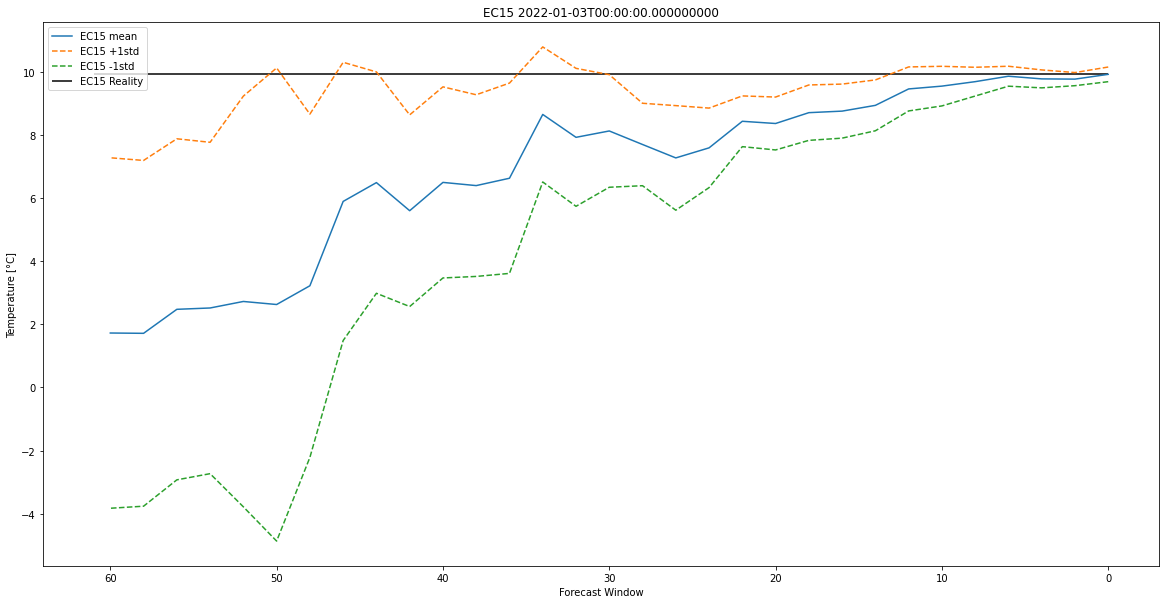

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ValueDateTime = DeEc15Mean.ValueDateTime.unique()[0]
DeEc15Mean[DeEc15Mean.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='value', ax=ax, label='EC15 mean').invert_xaxis()
DeEc15Mean[DeEc15Mean.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='+1std', ax=ax, label='EC15 +1std', linestyle='dashed')
DeEc15Mean[DeEc15Mean.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='-1std', ax=ax, label='EC15 -1std', linestyle='dashed')
ax.hlines(y=RealityDeEc15[RealityDeEc15.ValueDateTime == ValueDateTime].value.values[0], xmin=DeEc15Mean.ForecastWindow.min(),
        xmax=DeEc15Mean.ForecastWindow.max(), color='black', label='EC15 Reality', linestyle='-')
#RealityDeEc15[RealityDeEc15.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='value', ax=ax, label='EC15 Reality', marker='o', linestyle='None')
ax.set_xlabel("Forecast Window")
ax.set_ylabel("Temperature [°C]")
ax.set_title("EC15 " + str(ValueDateTime))
ax.legend()
plt.show()